## Data Validation and Analysis for Simulated Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

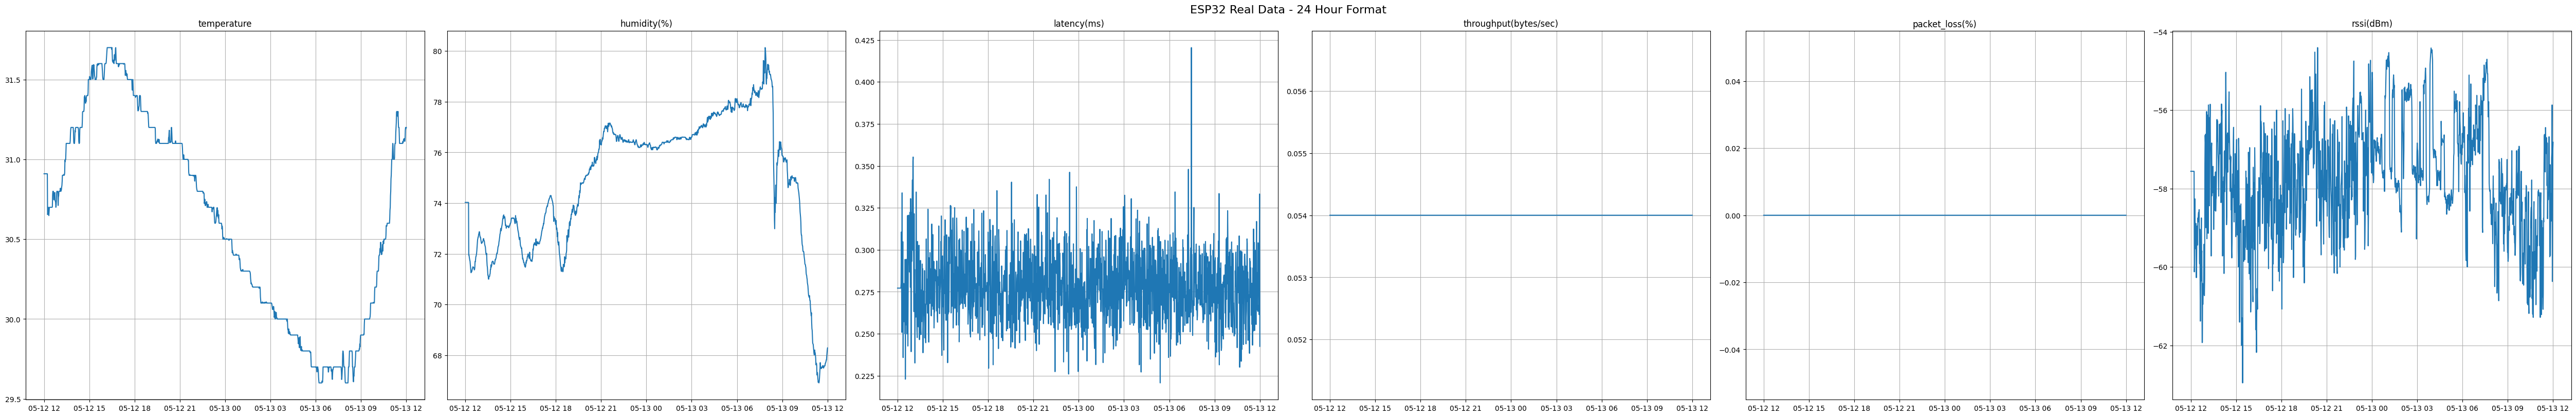

In [9]:
# Load the real data
real_data = pd.read_csv("../dataset/esp32_1_data.csv")

# Change the time column to datetime format and split it into date and time
real_data["timestamp"] = pd.to_datetime(real_data["timestamp"], format="%Y-%m-%d | %H:%M:%S")

# Set the timestamp as the index
real_data.set_index("timestamp", inplace=True)
df_resampled = real_data.resample("min").mean()

# Impute missing values using mean of the column
df_resampled.fillna(df_resampled.mean(), inplace=True)

# Show the data in 24 hours from 12:00:00 to 12:00:00
df_one_day_format = df_resampled.loc["2025-05-12 12:00:00":"2025-05-13 12:00:00"]

# Define num of rows and columns for the subplots
num_cols = 6
num_rows = int(np.ceil(len(df_one_day_format.columns) / num_cols))

# Create the figure and axes for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 8), constrained_layout=True)

# Flatten the axes array for iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, column in enumerate(df_one_day_format.columns):
  axes[i].plot(df_one_day_format[column])
  axes[i].set_title(column)
  axes[i].grid(True)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

# Set the overall title for the figure
fig.suptitle("ESP32 Real Data - 24 Hour Format", fontsize=16)
plt.show()

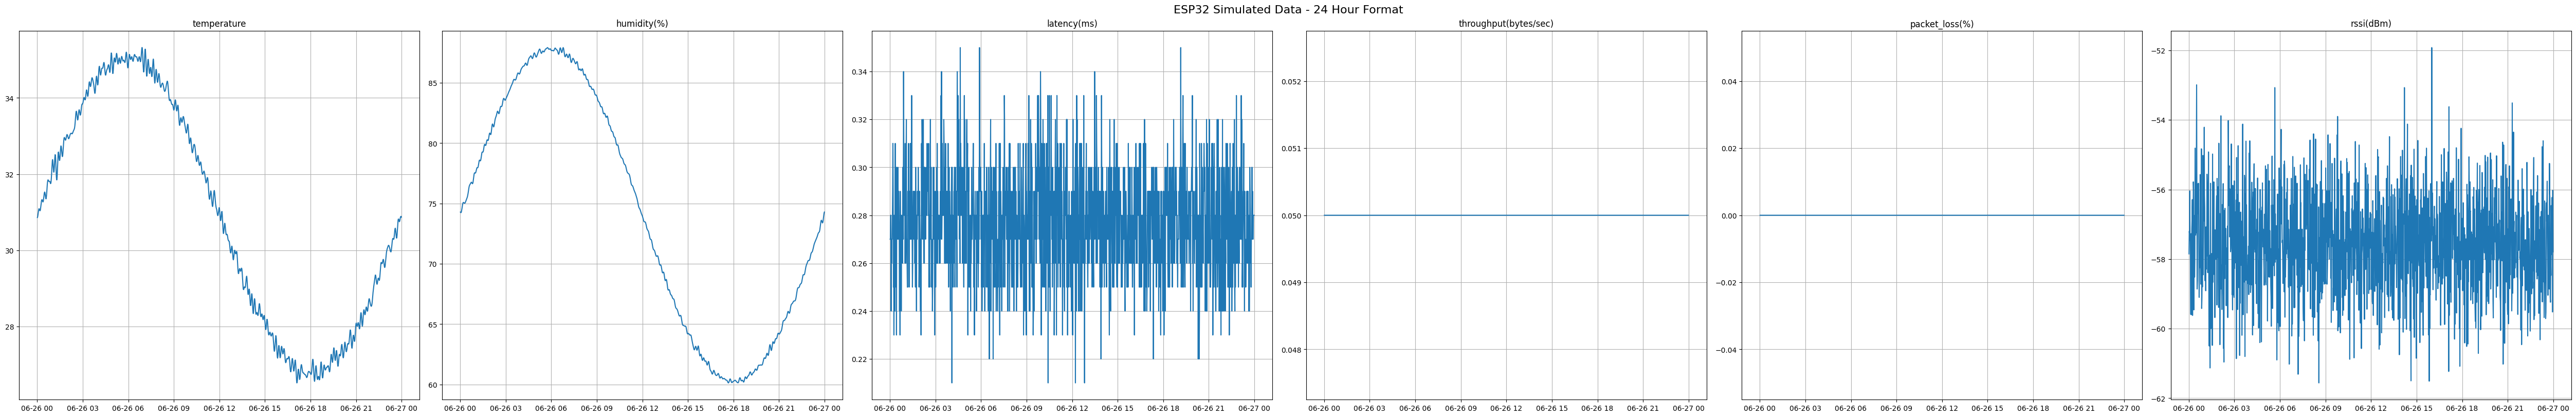

In [3]:
# Load the dataset
simulated_data = pd.read_csv("../dataset/simulation_data_20250626_112921.csv")

# Change the time column to datetime format and split it into date and time
simulated_data["timestamp"] = pd.to_datetime(simulated_data["timestamp"], format="%Y-%m-%d | %H:%M:%S")

# Set the timestamp as the index
simulated_data.set_index("timestamp", inplace=True)

# Define num of rows and columns for the subplots
num_cols = 6
num_rows = int(np.ceil(len(simulated_data.columns) / num_cols))

# Create the figure and axes for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 8), constrained_layout=True)

# Flatten the axes array for iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, column in enumerate(simulated_data.columns):
  axes[i].plot(simulated_data[column])
  axes[i].set_title(column)
  axes[i].grid(True)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

# Set the overall title for the figure
fig.suptitle("ESP32 Simulated Data - 24 Hour Format", fontsize=16)
plt.show()

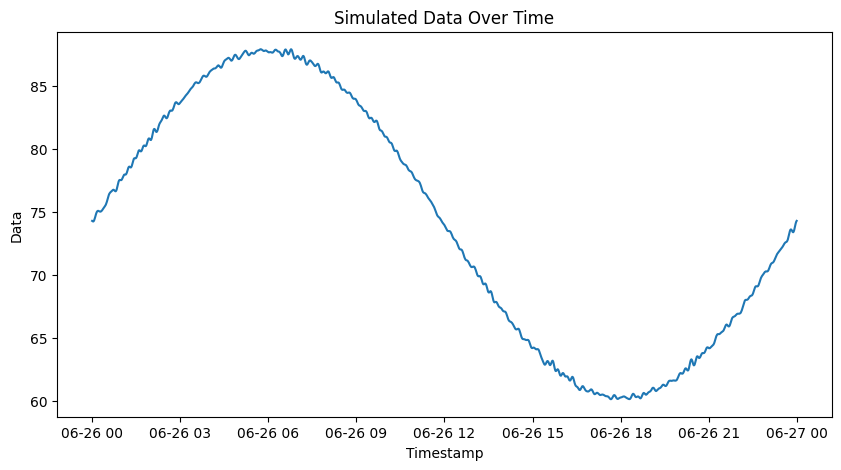

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(simulated_data.index, simulated_data["humidity(%)"], label="Simulated Temperature")
plt.xlabel("Timestamp")
plt.ylabel("Data")
plt.title(f"Simulated Data Over Time")
plt.show()